In [1]:
#Changing directory
import os
os.chdir("C:\\Study Material\\UTD studymaterial\\Applied Machine Learning\\Assignment_2")

In [39]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error,confusion_matrix, roc_curve,roc_auc_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [4]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, scoring=None, obj_line=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), figsize = (10,6)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.
               
    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
        
    Citation
    --------
        http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
    """
    from sklearn.model_selection import learning_curve
    import numpy as np
    from matplotlib import pyplot as plt
    
    plt.figure(figsize = figsize)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    if obj_line:
        plt.axhline(y=obj_line, color='blue')

    plt.legend(loc="best")
    return plt


In [5]:
def plot_learning_curves_nimb(param, train_scores,test_scores,ylim=None, xlabel='paramater range',  obj_line=None,title='learning curve', figsize = (10,6)):
    """Plot training and test scores in relation to a parameter setting
    
        Citation
    --------
        http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
"""

    plt.figure(figsize = figsize)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel(xlabel)
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(param, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(param, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(param, train_scores_mean, 'o-', color="r",
             label="Training score via CV")
    plt.plot(param, test_scores_mean, 'o-', color="g",
             label="Testing Score via CV")

    if obj_line:
        plt.axhline(y=obj_line, color='blue')

    plt.legend(loc="best")
    return plt

In [12]:
#importing dataset
Energy_data = pd.read_csv("C:\\Study Material\\UTD studymaterial\\Applied Machine Learning\\Assignment_2\\energydata_daynight.csv")

# Feature Engineering & Feature Exploration

In [13]:
#Preparing the dataset by encoding the day_night column
Energy_data = Energy_data.drop(columns = "date")
Day_Night_dummies = pd.get_dummies(Energy_data, columns = ['Day_Night'],drop_first=True)

In [14]:
#Checking the null in the dataset
Energy_data.isnull().any()

Appliances     False
lights         False
T1             False
RH_1           False
T2             False
RH_2           False
T3             False
RH_3           False
T4             False
RH_4           False
T5             False
RH_5           False
T6             False
RH_6           False
T7             False
RH_7           False
T8             False
RH_8           False
T9             False
RH_9           False
T_out          False
Press_mm_hg    False
RH_out         False
Windspeed      False
Visibility     False
Tdewpoint      False
rv1            False
rv2            False
Day_Night      False
dtype: bool

In [17]:
Edata = Energy_data
mean = Edata['Appliances'].mean()#calculating the mean of the appliances column
Edata['Appliances'] = Edata['Appliances'].apply(lambda x: 1 if (x> mean) else 0)

In [28]:
Edata['Appliances'].dtype

dtype('int64')

In [18]:
Edata

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Day_Night
0,0,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,45.530000,6.60,733.500000,92.000000,7.000000,63.000000,5.30,13.275433,13.275433,0
1,0,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,45.560000,6.48,733.600000,92.000000,6.666667,59.166667,5.20,18.606195,18.606195,0
2,0,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,45.500000,6.37,733.700000,92.000000,6.333333,55.333333,5.10,28.642668,28.642668,0
3,0,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,45.400000,6.25,733.800000,92.000000,6.000000,51.500000,5.00,45.410390,45.410390,0
4,0,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,45.400000,6.13,733.900000,92.000000,5.666667,47.666667,4.90,10.084097,10.084097,0
5,0,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,...,45.290000,6.02,734.000000,92.000000,5.333333,43.833333,4.80,44.919484,44.919484,0
6,0,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,...,45.290000,5.90,734.100000,92.000000,5.000000,40.000000,4.70,47.233763,47.233763,0
7,0,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,...,45.290000,5.92,734.166667,91.833333,5.166667,40.000000,4.68,33.039890,33.039890,0
8,0,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,...,45.290000,5.93,734.233333,91.666667,5.333333,40.000000,4.67,31.455702,31.455702,0
9,0,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,46.096667,...,45.290000,5.95,734.300000,91.500000,5.500000,40.000000,4.65,3.089314,3.089314,0


In [19]:
Edata.shape[1]

29

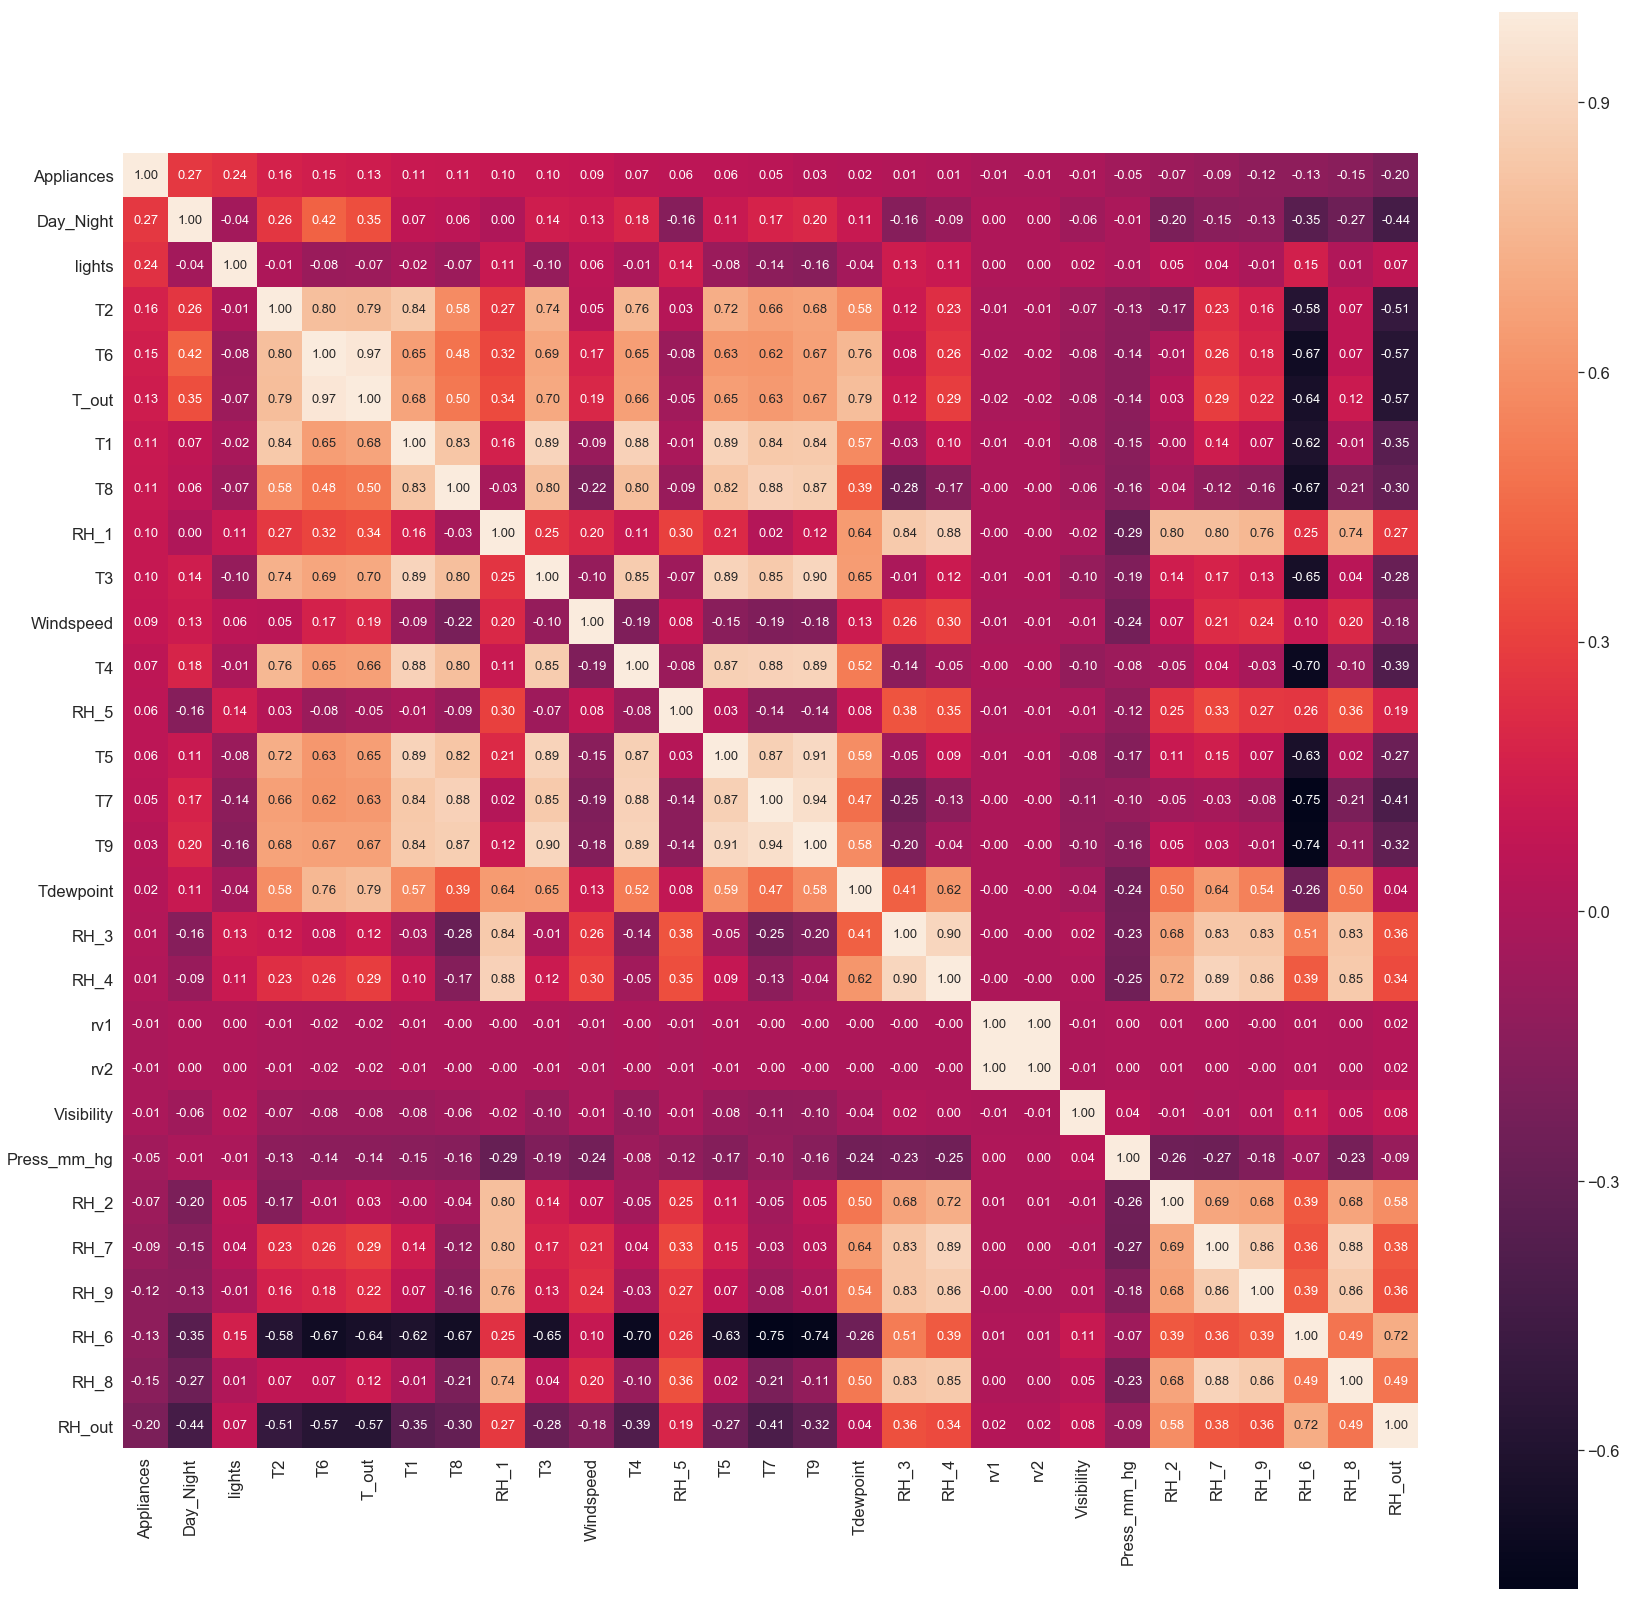

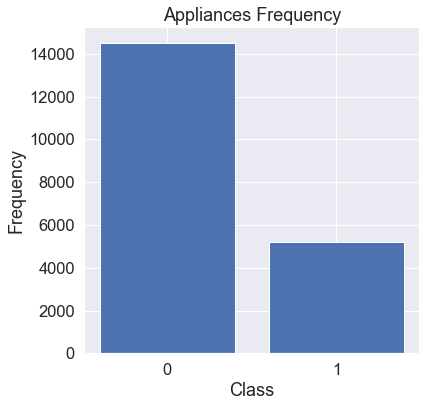

In [20]:
#Heatmap to show the correlation score
corrmat = Edata.corr()
k = 30 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Appliances')['Appliances'].index
cm = np.corrcoef(Edata[cols].values.T)
sns.set(font_scale=1.50)
plt.subplots(figsize=(29,29))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13},yticklabels=cols.values, xticklabels=cols.values)
plt.show()

unique, counts = np.unique(Edata.Appliances, return_counts=True)
plt.figure(figsize = (6,6))
plt.bar(unique,counts)
plt.title('Appliances Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0,1], unique)
plt.show()

# FEATURE SCALING

In [46]:
#Splitting dataset into X and y 
X_Energy = Edata.iloc[:,1:].values
y_Energy = Edata.iloc[:,1].values

In [22]:
#Splitting into train and test data
from sklearn.model_selection import train_test_split
x_train_Energy, x_test_Energy, y_train_Energy, y_test_Energy = train_test_split(X_Energy, y_Energy, test_size = .30, random_state = 0)

from sklearn.preprocessing import StandardScaler
full_xscaler = StandardScaler().fit(x_train_Energy)
x_train_scaled_Energy = full_xscaler.transform(x_train_Energy)
x_test_scaled_Energy = full_xscaler.transform(x_test_Energy)

In [23]:
pca = PCA(n_components=.90,random_state=123456)
x_train_scaled_pca_Energy = pca.fit_transform(x_train_scaled_Energy)
x_test_scaled_pca_Energy = pca.transform(x_test_scaled_Energy)
x_train_scaled_pca_Energy.shape

(13814, 9)

In [24]:
x_train_scaled_Energy.shape

(13814, 28)

# IMPLEMENTING SUPPORT VECTOR MACHINES

1. SVC Parameters When Using RBF Kernel

    Gamma:
    Gamma is a parameter of the RBF kernel and can be thought of as the ‘spread’ of the kernel and therefore the decision region. When gamma is low, the ‘curve’ of the decision boundary is very low and thus the decision region is very broad. When gamma is high, the ‘curve’ of the decision boundary is high, which creates islands of decision-boundaries around data points. We will see this very clearly below.

    C:
    C is a parameter of the SVC learner and is the penalty for misclassifying a data point. When C is small, the classifier is okay with misclassified data points (high bias, low variance). When C is large, the classifier is heavily penalized for misclassified data and therefore bends over backwards avoid any misclassified data points (low bias, high variance).

    Here in our implementation we will be experimenting with the values of gamma & C

To find the best value of Gamma

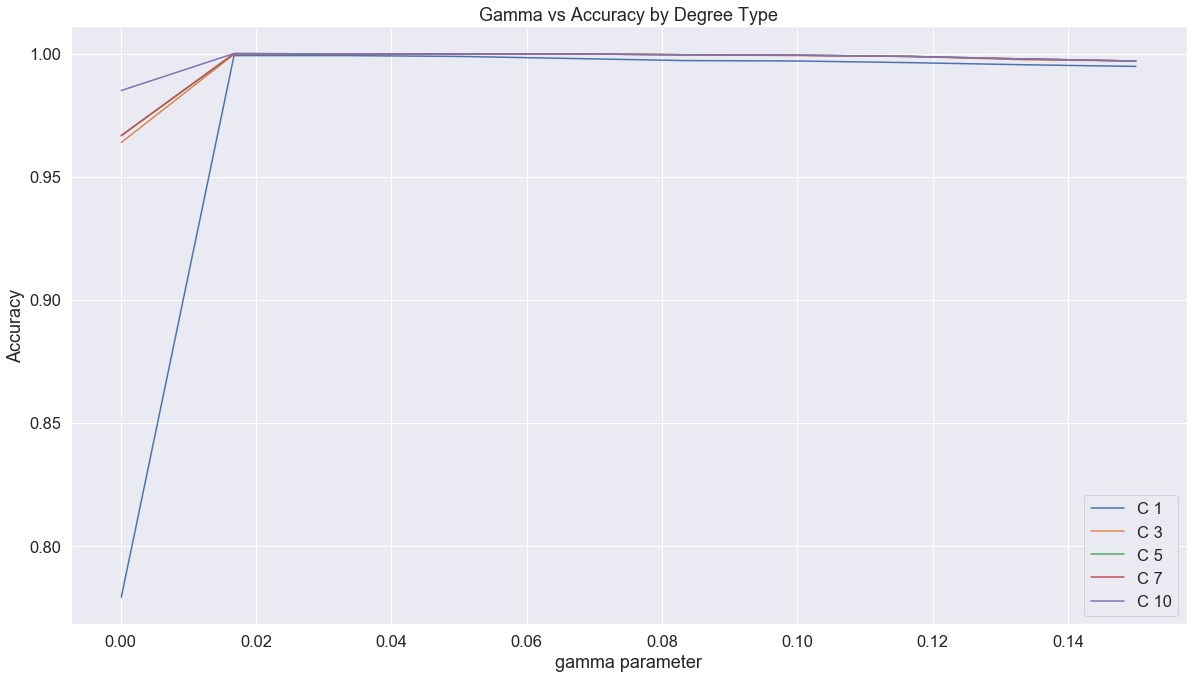

In [25]:
#grid_search_rbf = pd.DataFrame(columns = ['C', 'gamma', 'score','time', 'start_time'])
c_range = np.linspace(start = 1, stop = 10, num = 5)
gamma_range = np.linspace(start = .0001, stop = .15,num = 10)
plt.figure(figsize = (20,11))
for c in c_range:
    score_list = []
    for g in gamma_range:
        svmclf = svm.SVC(C = c, kernel = 'rbf', gamma = g)
        svmclf.fit(x_train_scaled_pca_Energy,y_train_Energy)
        score = svmclf.score(x_test_scaled_pca_Energy, y_test_Energy)
        score_list.append(score)
    plt.title('Gamma vs Accuracy by Degree Type')
    plt.plot(gamma_range,score_list, label = 'C %i' % c)
    plt.xlabel('gamma parameter')
    plt.ylabel('Accuracy')
    plt.legend()

To find the best value of C parameter

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The mi

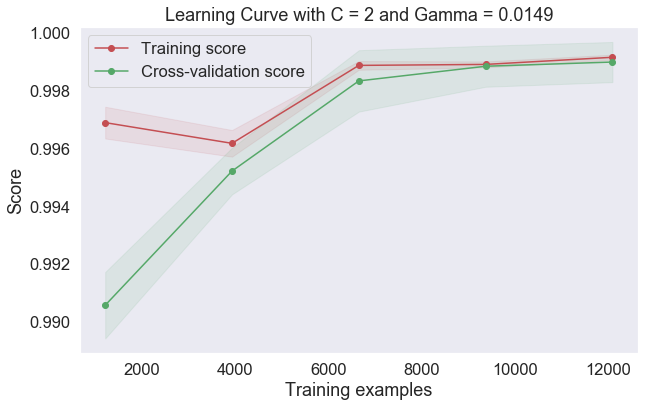

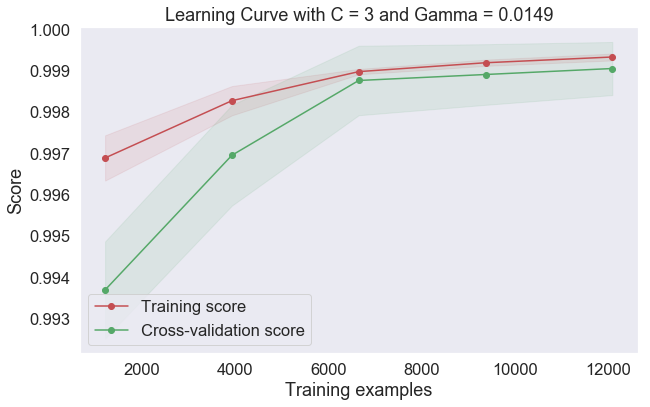

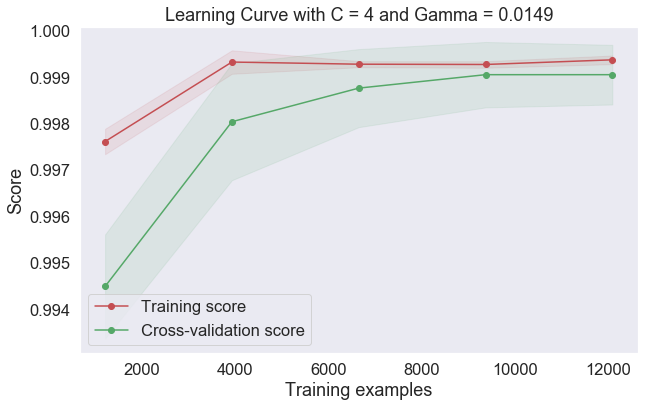

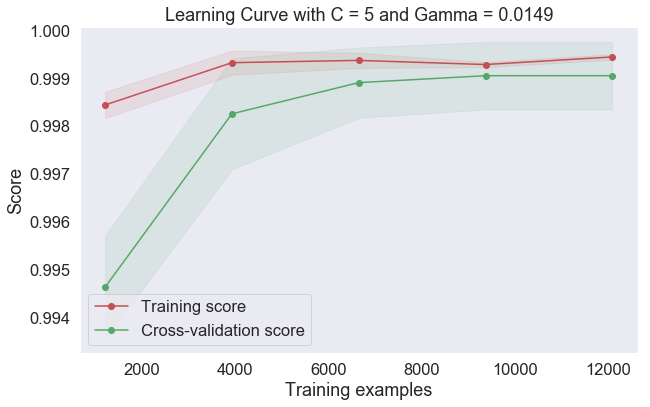

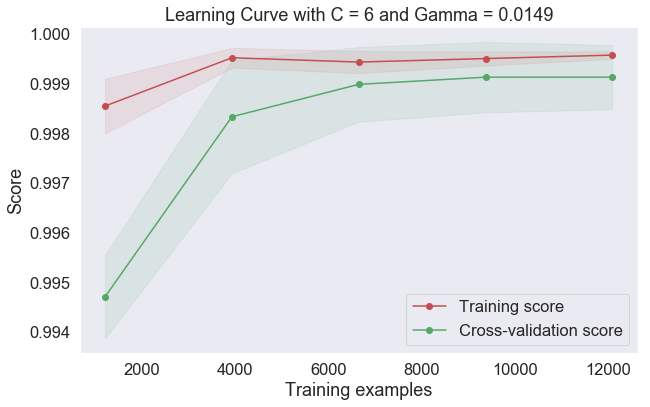

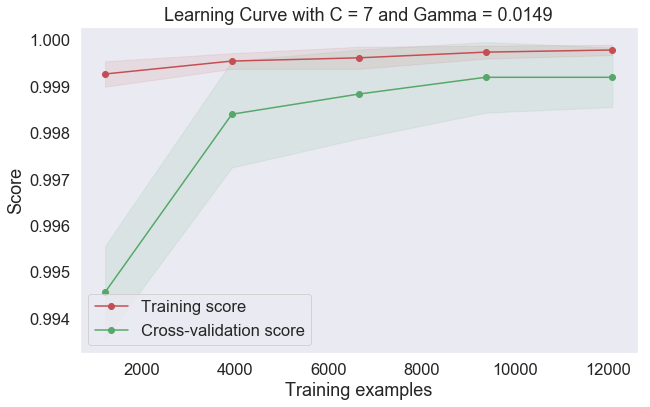

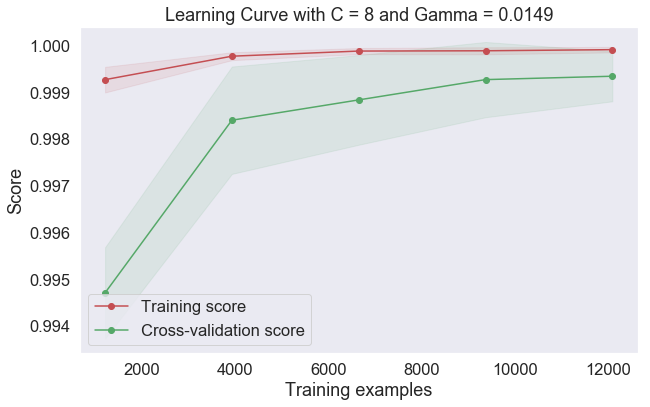

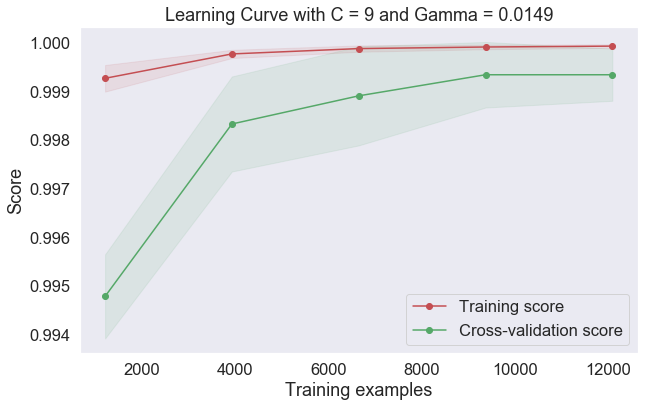

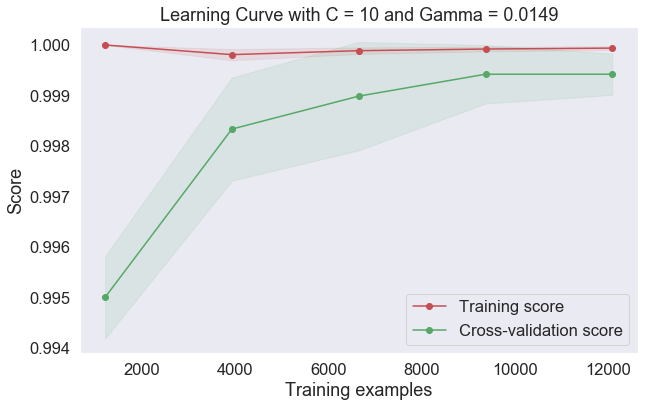

In [144]:
cv = 8
c_range = [2,3,4,5,6,7,8,9,10]

for i in c_range:
    svmclf = svm.SVC(C = i, kernel = 'rbf', gamma = .0149)
    svmclf.fit(x_train_scaled_pca_Energy,y_train_Energy)
    plot_learning_curve(svmclf,title = f'Learning Curve with C = {i} and Gamma = 0.0149',X= x_train_scaled_pca_Energy,y= y_train_Energy,cv = cv,n_jobs = -1)

2. SVM Using Polynomial Kernel

Plotting Accuracy as a function of Gamma parameter, C value and the degree value for the various polynomial kernels. Basically, trying to find the optimal value of Gamma

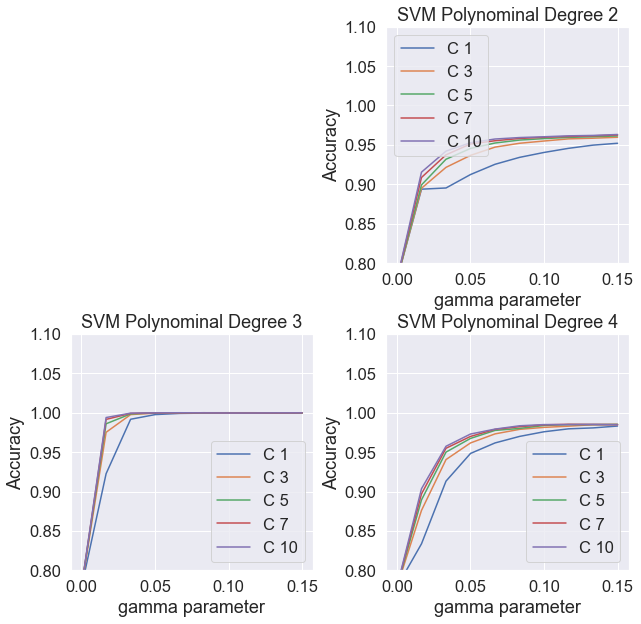

In [47]:
fig = plt.figure(figsize = (10,10))
fig.subplots_adjust(hspace=.3, wspace=.3)
c_range = np.linspace(start = 1, stop = 10, num = 5)
gamma_range = np.linspace(start = .0001, stop = .15,num = 10)
degree_list = [2,3,4]
for d in degree_list:
    ax = fig.add_subplot(2, 2,d)
    for c in c_range:
        score_list = []
        for g in gamma_range:
            svmpl = svm.SVC(C = c, kernel = 'poly',degree=d, gamma = g)
            svmpl.fit(x_train_scaled_pca_Energy,y_train_Energy)
            score = svmpl.score(x_test_scaled_pca_Energy, y_test_Energy)
            score_list.append(score)

        ax.set_title('SVM Polynominal Degree %i' % d)
        ax.plot(gamma_range,score_list, label = 'C %i' % c)
        ax.legend()
        ax.set_ylabel('Accuracy')
        ax.set_ylim(bottom =.80, top=1.10)
        ax.set_xlabel('gamma parameter')

Learning graph for Gamma 0.03008, different degree and c = 3

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)


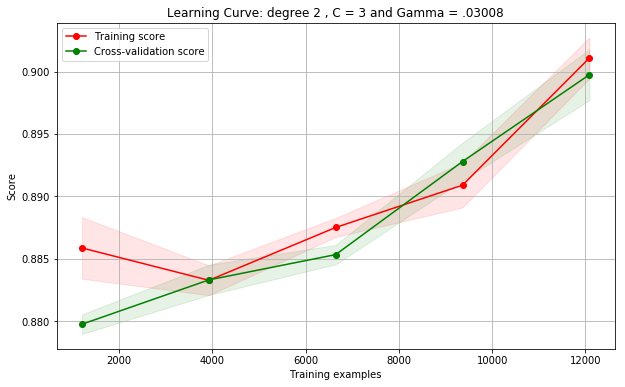

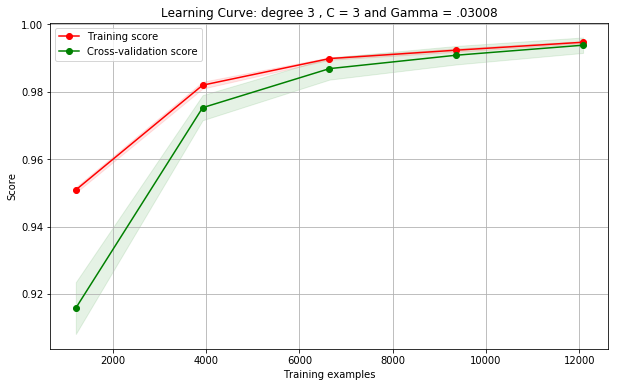

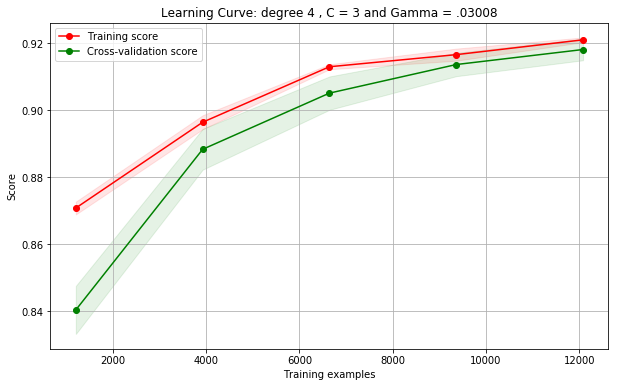

In [26]:
cv = 8
degree_list = [2,3,4]
for d in degree_list:
    svmpl = svm.SVC(C = 3, kernel = 'poly',degree=d, gamma= .03008)
    svmpl.fit(x_train_scaled_pca_Energy,y_train_Energy)
    plot_learning_curve(svmpl,title = f'Learning Curve: degree {d} , C = 3 and Gamma = .03008',X= x_train_scaled_pca_Energy,y= y_train_Energy,cv = 8,n_jobs = -1)

3. SVM using Linear Kernel

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The mi

<module 'matplotlib.pyplot' from 'C:\\Users\\shrey\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

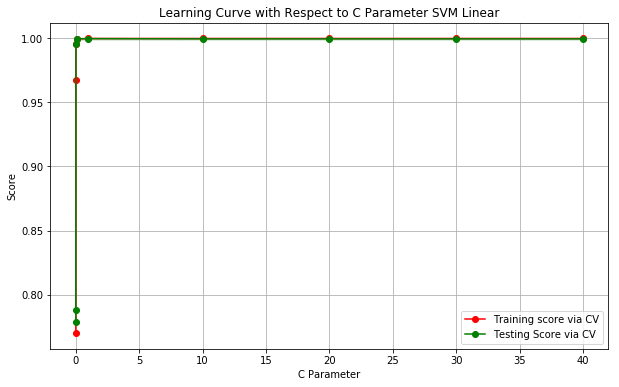

In [34]:
cv = 8
C_range = [0.0001,0.001,0.01,0.1,1,10,20,30,40]
train_accuracy = []
test_accuracy = []
score = []    

for c in C_range:
    svmlr = svm.SVC(C = c, kernel = 'linear')
    svmlr.fit(x_train_scaled_pca_Energy,y_train_Energy)
    score.append(svmlr.score(x_test_scaled_pca_Energy,y_test_Energy))
    train_accuracy.append(cross_val_score(svmlr,x_train_scaled_pca_Energy,y_train_Energy,cv = cv, n_jobs = -1))
    test_accuracy.append(cross_val_score(svmlr,x_test_scaled_pca_Energy,y_test_Energy,cv = cv, n_jobs = -1))
plot_learning_curves_nimb(C_range, train_accuracy, test_accuracy, xlabel='C Parameter', title = 'Learning Curve with Respect to C Parameter SVM Linear')

Plotting the learing curve for the C values 0.001, 0.01 & 0.1 over the training and validation set to get a closer look as to which parameter provides the better bias/variance tradeoff

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)


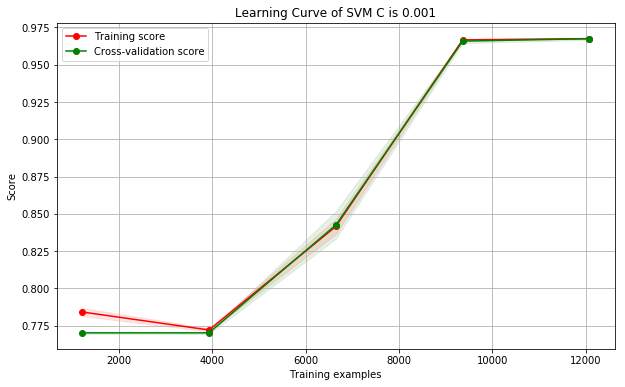

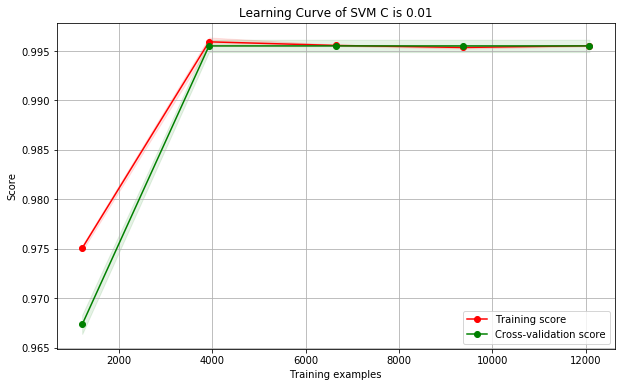

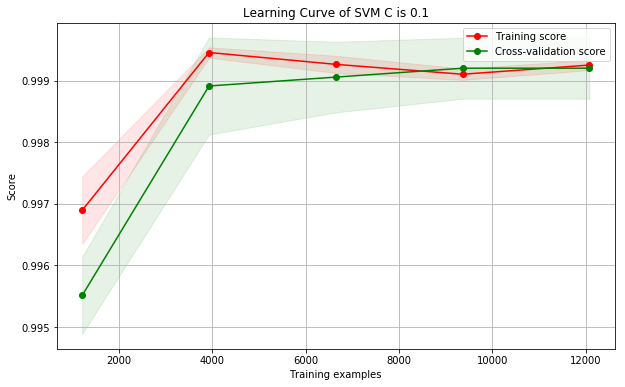

In [37]:
cv = 8
c_range = [0.001, 0.01, 0.1]

for i in c_range:
    svmlr = svm.SVC(C = i, kernel = 'linear')
    svmlr.fit(x_train_scaled_pca_Energy,y_train_Energy)
    plot_learning_curve(svmlr,'Learning Curve of SVM C is %s' %i ,x_train_scaled_pca_Energy, y_train_Energy,cv = cv,n_jobs=-1)

DECISION TREES

1. Selecting the appropriate depth of the tree in order to implement pruning

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The mi

<module 'matplotlib.pyplot' from 'C:\\Users\\shrey\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

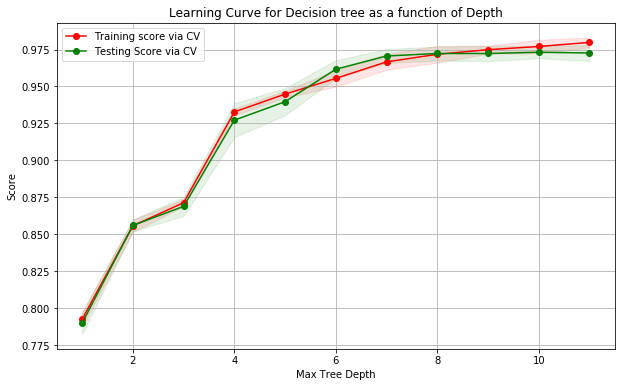

In [67]:
cv = 8
depth_range = range(1,12)
train_accuracy = []
test_accuracy = []
for i in depth_range:
    tree1 = tree.DecisionTreeClassifier(max_depth=i)
    tree1.fit(x_train_scaled_pca_Energy,y_train_Energy)
    train_accuracy.append(cross_val_score(tree1,x_train_scaled_pca_Energy,y_train_Energy,cv = cv, n_jobs = -1))
    test_accuracy.append(cross_val_score(tree1,x_test_scaled_pca_Energy,y_test_Energy,cv = cv, n_jobs = -1))
plot_learning_curves_nimb(depth_range, train_accuracy, test_accuracy, title=f'Learning Curve for Decision tree as a function of Depth', xlabel='Max Tree Depth')

2. Finding the optimal no. of features to be used

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The mi

<module 'matplotlib.pyplot' from 'C:\\Users\\shrey\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

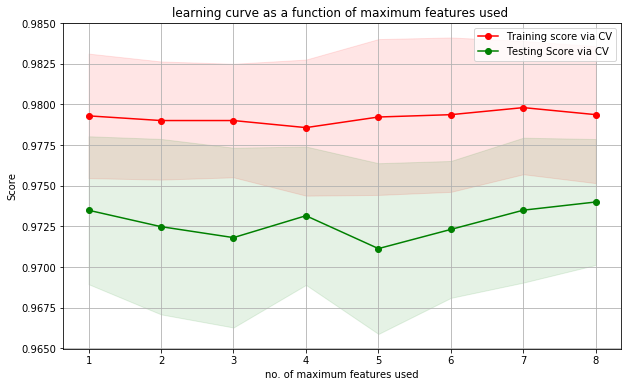

In [70]:
cv = 8
no_of_column = x_train_scaled_pca_Energy.shape[1]
feature_range = range(1, no_of_column)
train_accuracy = []
test_accuracy = []

for i in feature_range:
    tree2 = tree.DecisionTreeClassifier(max_depth=7,max_features=i)
    tree2.fit(x_train_scaled_pca_Energy,y_train_Energy)
    train_accuracy.append(cross_val_score(tree1,x_train_scaled_pca_Energy,y_train_Energy,cv = cv, n_jobs = -1))
    test_accuracy.append(cross_val_score(tree1,x_test_scaled_pca_Energy,y_test_Energy,cv = cv, n_jobs = -1))

plot_learning_curves_nimb(feature_range, train_accuracy, test_accuracy,xlabel='no. of maximum features used', title= 'learning curve as a function of maximum features used ')

Plotting the decision tree with the best depth value and optimal no. of features along with CV value as 8

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)


<module 'matplotlib.pyplot' from 'C:\\Users\\shrey\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

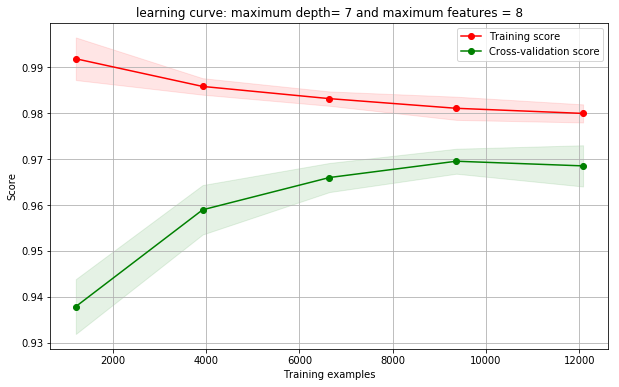

In [75]:
final_tree = tree.DecisionTreeClassifier(max_depth=7, max_features=8)
plot_learning_curve(final_tree,'learning curve: maximum depth= 7 and maximum features = 8',x_train_scaled_pca_Energy,y_train_Energy,cv = 8, n_jobs=-1)

Showing the Gini and Entropy plot for the impurity to select which one maximizes the classification accuracy. Entropy preferred as it provides higher accuracy value

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)


Text(0, 0.5, 'Accuracy')

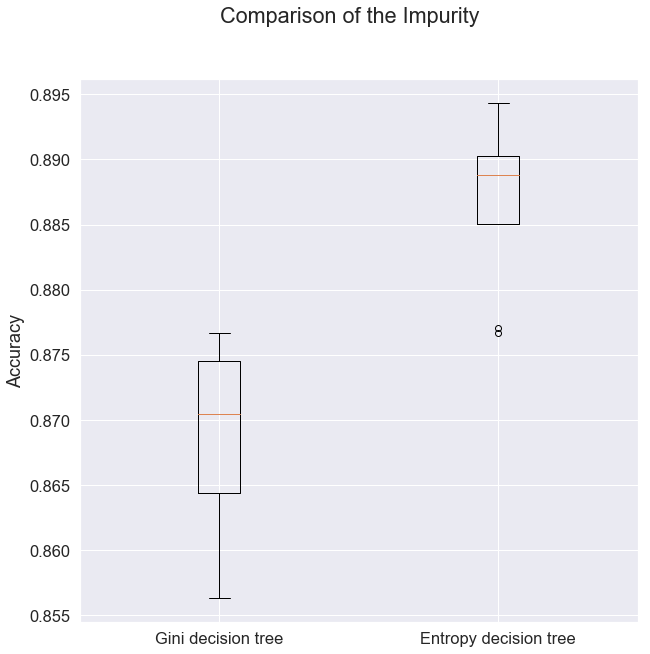

In [45]:
tree_ = []
cv = 8
#gini
tree_g = tree.DecisionTreeClassifier(max_depth=3,criterion='gini')
tree_g.fit(x_train_scaled_pca_Energy,y_train_Energy)
tree_.append(cross_val_score(tree_g,  x_test_scaled_pca_Energy,y_test_Energy,cv=cv, scoring='accuracy'))

#entropy
tree_e = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')
tree_e.fit(x_train_scaled_pca_Energy,y_train_Energy)
tree_.append(cross_val_score(tree_e, x_test_scaled_pca_Energy,y_test_Energy,cv=cv, scoring='accuracy'))

#Plot the best results
classes = ['Gini decision tree','Entropy decision tree']
fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison of the Impurity')
ax = fig.add_subplot(111)
plt.boxplot(tree_)
ax.set_xticklabels(classes)
ax.set_ylabel('Accuracy')

BOOSTING (ADABOOST)

Experimenting to find the optimal value of estimators to be used for boosting

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The mi

<module 'matplotlib.pyplot' from 'C:\\Users\\shrey\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

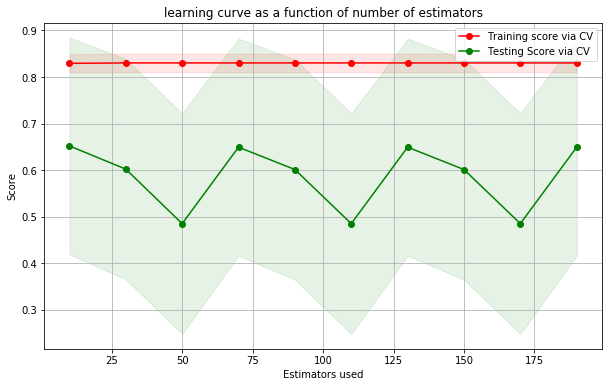

In [89]:
cv = 8
estimator_range = range(10,200,20)
train_accuracy = []
test_accuracy = []

for i in (estimator_range):
    ada_boost = AdaBoostClassifier(n_estimators=i)
    ada_boost.fit(x_train_scaled_pca_Energy,y_train_Energy)
    train_accuracy.append(cross_val_score(ada_boost,x_train_scaled_pca_Energy,y_train_Energy,cv = cv, n_jobs = -1))
    test_accuracy.append(cross_val_score(ada_boost,x_test_scaled_pca_Energy,y_test_Energy,cv = cv, n_jobs = -1))
plot_learning_curves_nimb(estimator_range, train_accuracy, test_accuracy ,xlabel='Estimators used', title= 'learning curve as a function of number of estimators')

Plot to show the learning curves for various values of estimators showing optimal behaviour for the accuracy calculation in boosting

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The mi

Accuracy: 0.8420874852220909


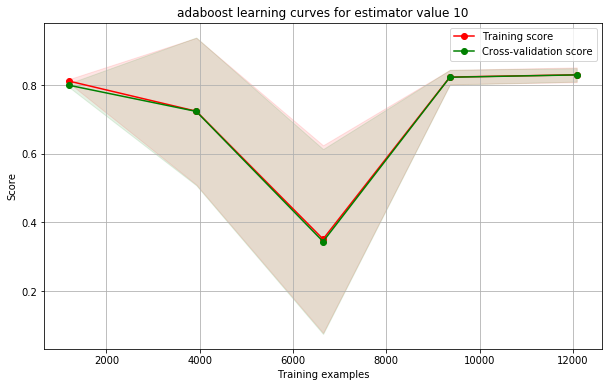

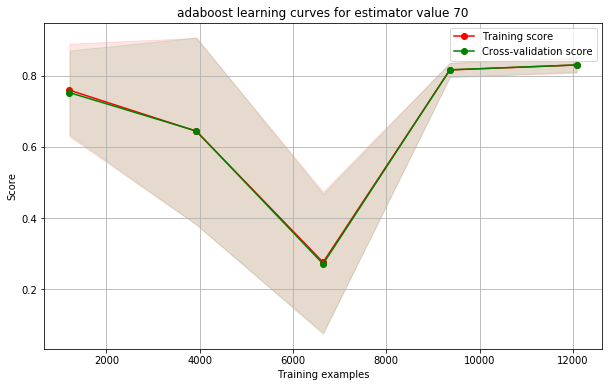

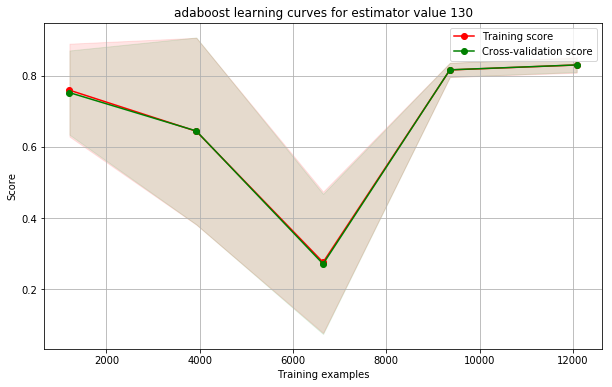

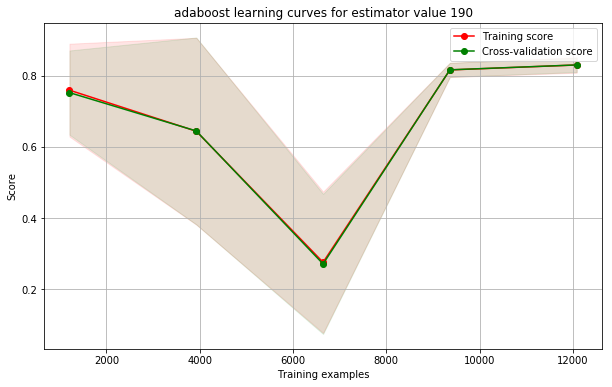

In [95]:
cv = 8
estimator_list = [10, 70, 130,190]
for i in estimator_list:
    ada_boost2 = AdaBoostClassifier(n_estimators=i)
    ada_boost2.fit(x_train_scaled_pca_Energy,y_train_Energy)
    plot_learning_curve(ada_boost2,f'adaboost learning curves for estimator value {i}', x_train_scaled_pca_Energy,y_train_Energy, cv = cv, n_jobs = -1)

y_pred = ada_boost2.predict(x_test_scaled_pca_Energy)
print("Accuracy:",metrics.accuracy_score(y_test_Energy, y_pred))

# COMPARING ALL THE BEST VERSIONS OF SVM, DECISION TREE AND BOOSTING

Calculating the accuracy on the test and the training dataset for the various models to select the best model

In [42]:
cv =8

#SVM with Linear Kernel
svmlr = svm.SVC(C = 0.1, kernel = 'linear', probability=True)
svmlr = svmlr.fit(x_train_scaled_pca_Energy,y_train_Energy)

#SVM with RBF Kernel
svmrbf = svm.SVC(C = 3, kernel = 'rbf', gamma = .0149, probability=True)
svmrbf = svmrbf.fit(x_train_scaled_pca_Energy,y_train_Energy)

#SVM with Poly Kernel
svmpl = svm.SVC(C = 3, kernel = 'poly',degree=3, gamma = 0.03008, probability=True)
svmpl = svmpl.fit(x_train_scaled_pca_Energy,y_train_Energy)

#Decision tree with optimum depth value
deci_tree = tree.DecisionTreeClassifier(max_depth=7)
deci_tree = deci_tree.fit(x_train_scaled_pca_Energy,y_train_Energy)

#Boosted Tree with optimum estimator value
ada_boost = AdaBoostClassifier(n_estimators=10)
ada_boost = ada_boost.fit(x_train_scaled_pca_Energy,y_train_Energy)

pred_out_linear_svm_train = svmlr.predict(x_train_scaled_pca_Energy)
pred_out_linear_svm_test = svmlr.predict(x_test_scaled_pca_Energy)
print("Accuracy Score for svm linear best model for train set:", accuracy_score(y_train_Energy, pred_out_linear_svm_train))
print("Accuracy Score for svm linear best model for test set:",accuracy_score(y_test_Energy, pred_out_linear_svm_test))

pred_out_svmrbf_train = svmrbf.predict(x_train_scaled_pca_Energy)
pred_out_svmrbf_test = svmrbf.predict(x_test_scaled_pca_Energy)
print("Accuracy Score for svm rbf best model for train set:", accuracy_score(y_train_Energy, pred_out_svmrbf_train))
print("Accuracy Score for svm rbf best model for test set:",accuracy_score(y_test_Energy, pred_out_svmrbf_test))

pred_out_svmpl_train = svmpl.predict(x_train_scaled_pca_Energy)
pred_out_svmpl_test = svmpl.predict(x_test_scaled_pca_Energy)
print("Accuracy Score for svm poly best model for train set:", accuracy_score(y_train_Energy, pred_out_svmpl_train))
print("Accuracy Score for svm poly best model for test set:",accuracy_score(y_test_Energy, pred_out_svmpl_test))

pred_out_deci_tree_train = deci_tree.predict(x_train_scaled_pca_Energy)
pred_out_deci_tree_test = deci_tree.predict(x_test_scaled_pca_Energy)
print("Accuracy Score for deci_tree best model for train set:", accuracy_score(y_train_Energy, pred_out_deci_tree_train))
print("Accuracy Score for deci_tree best model for test set:",accuracy_score(y_test_Energy, pred_out_deci_tree_test))

pred_out_ada_boost_train = ada_boost.predict(x_train_scaled_pca_Energy)
pred_out_ada_boost_test = ada_boost.predict(x_test_scaled_pca_Energy)
print("Accuracy Score for ada_boost best model for train set:", accuracy_score(y_train_Energy, pred_out_ada_boost_train))
print("Accuracy Score for ada_boost best model for test set:",accuracy_score(y_test_Energy, pred_out_ada_boost_test))


Accuracy Score for svm linear best model for train set: 0.999203706384827
Accuracy Score for svm linear best model for test set: 0.9996622192197264
Accuracy Score for svm rbf best model for train set: 0.9993484870421312
Accuracy Score for svm rbf best model for test set: 0.9994933288295896
Accuracy Score for svm poly best model for train set: 0.9953670189662661
Accuracy Score for svm poly best model for test set: 0.9962844114169904
Accuracy Score for deci_tree best model for train set: 0.9803098306066309
Accuracy Score for deci_tree best model for test set: 0.972808647187975
Accuracy Score for ada_boost best model for train set: 0.8391486897350514
Accuracy Score for ada_boost best model for test set: 0.8420874852220909


Ploting the accuracy value for the various models

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=8.
  % (min_groups, self.n_splits)), Warning)
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The mi

Text(0, 0.5, 'Accuracy')

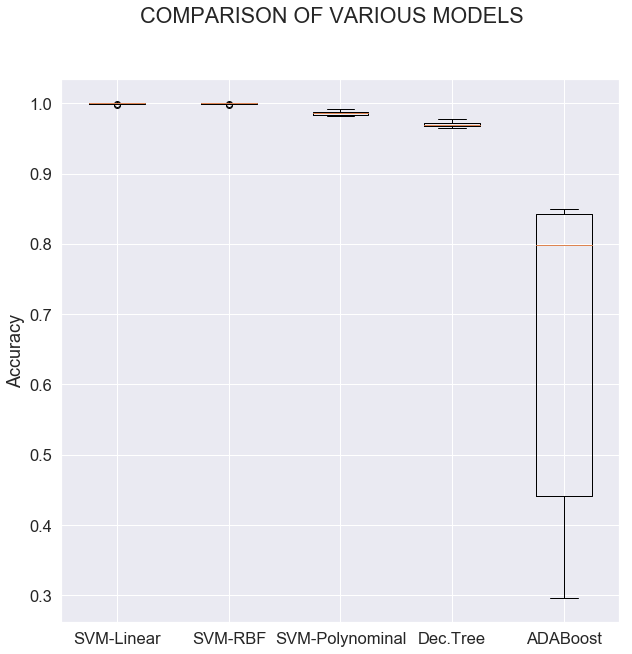

In [32]:
#Plot the best results

cv =8
model_results = []
#SVM with Linear Kernel
svmlr = svm.SVC(C = 0.1, kernel = 'linear', probability=True)
svmlr.fit(x_train_scaled_pca_Energy,y_train_Energy)

#SVM with RBF Kernel
svmrbf = svm.SVC(C = 3, kernel = 'rbf', gamma = .0149, probability=True)
svmrbf.fit(x_train_scaled_pca_Energy,y_train_Energy)

#SVM with Poly Kernel
svmpl = svm.SVC(C = 3, kernel = 'poly',degree=3, gamma = 0.03008, probability=True)
svmpl.fit(x_train_scaled_pca_Energy,y_train_Energy)

#Decision tree with optimum depth value
deci_tree = tree.DecisionTreeClassifier(max_depth=7)
deci_tree.fit(x_train_scaled_pca_Energy,y_train_Energy)

#Boosted Tree with optimum estimator value
ada_boost = AdaBoostClassifier(n_estimators=10)
ada_boost.fit(x_train_scaled_pca_Energy,y_train_Energy)

model_results.append(cross_val_score(svmlr,x_test_scaled_pca_Energy,y_test_Energy,cv=cv, scoring='accuracy'))
model_results.append(cross_val_score(svmrbf, x_test_scaled_pca_Energy,y_test_Energy,cv=cv, scoring='accuracy'))
model_results.append(cross_val_score(svmpl,x_test_scaled_pca_Energy,y_test_Energy,cv=cv, scoring='accuracy'))
model_results.append(cross_val_score(deci_tree,x_test_scaled_pca_Energy,y_test_Energy,cv=cv, scoring='accuracy'))
model_results.append(cross_val_score(ada_boost,x_test_scaled_pca_Energy,y_test_Energy,cv=cv, scoring='accuracy'))


models = ['SVM-Linear', 'SVM-RBF','SVM-Polynominal', 'Dec.Tree','ADABoost']
fig = plt.figure(figsize=(10,10))
fig.suptitle('COMPARISON OF VARIOUS MODELS')
ax = fig.add_subplot(111)
plt.boxplot(model_results)
ax.set_xticklabels(models)
ax.set_ylabel('Accuracy')